# Filters
Filters are functions that use more than one pixel from the source image to compute a result. Filters are implemented as convolution operation in which a kernel function H is applied onto the pixels of an image.

$$I'(u, v) = \sum_{i=-\infty}^{\infty} \sum_{j=-\infty}^{\infty}I(u - i, v - j)H(i, j)$$

We'll see som example of linear kernels and some of nonlinear ones.

In [4]:
import numpy as np
import skimage
from skimage import io
from skimage import util
import matplotlib.pyplot as plt

## Local 3x3 mean filter

In [5]:
def dip_localMeanFilter(image):
    # Creates a smoothed image from the input one by computing the
    # average value of each pixel from its neighbors' values
    rows = image.shape[0]
    cols = image.shape[1]
    smooth_img = np.zeros((rows, cols), dtype=int)
    
    for col in range(0, cols - 1):
        for row in range(0, rows - 1):
            sum = 0
            for i in range(-1, 2):
                for j in range(-1, 2):
                    v = image[row + i, col + j]
                    sum = sum + v
            smooth_img[row, col] = int(round( sum / 9.0 ))
    
    return smooth_img

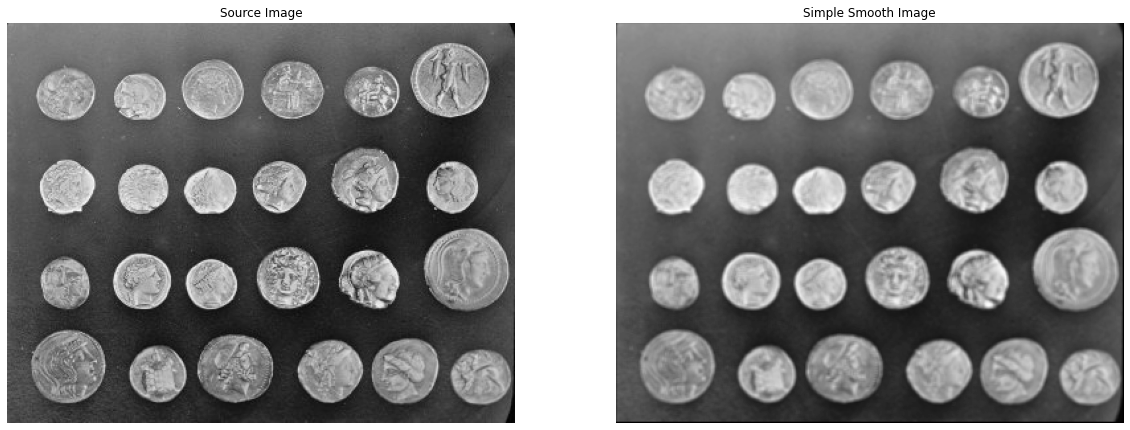

In [6]:
source_img = skimage.data.coins()
smooth_img = dip_localMeanFilter(source_img)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axes[0].set_axis_off()
axes[0].set_title('Source Image')
axes[0].imshow(source_img, cmap='gray')
axes[1].set_axis_off()
axes[1].set_title('Simple Smooth Image')
axes[1].imshow(smooth_img, cmap='gray')

## Local 3x3 Gaussian filter 

In [9]:
def dip_localGaussianFilter(image):
    # Creates a smoothed image from the input one by computing the
    # average value of each pixel from its neighbors' values
    H = np.array(((0.075, 0.125, 0.075), (0.125, 0.200, 0.125), (0.075, 0.125, 0.075))) # filter
    rows = image.shape[0]
    cols = image.shape[1]
    smooth_img = np.zeros((rows, cols), dtype=int)
    
    for col in range(0, cols - 1):
        for row in range(0, rows - 1):
            sum = 0
            for i in range(-1, 2):
                for j in range(-1, 2):
                    v = image[row + i, col + j] * H[i + 1, j + 1]
                    sum = sum + v
            smooth_img[row, col] = int(round( sum / 9.0 ))
    
    return smooth_img

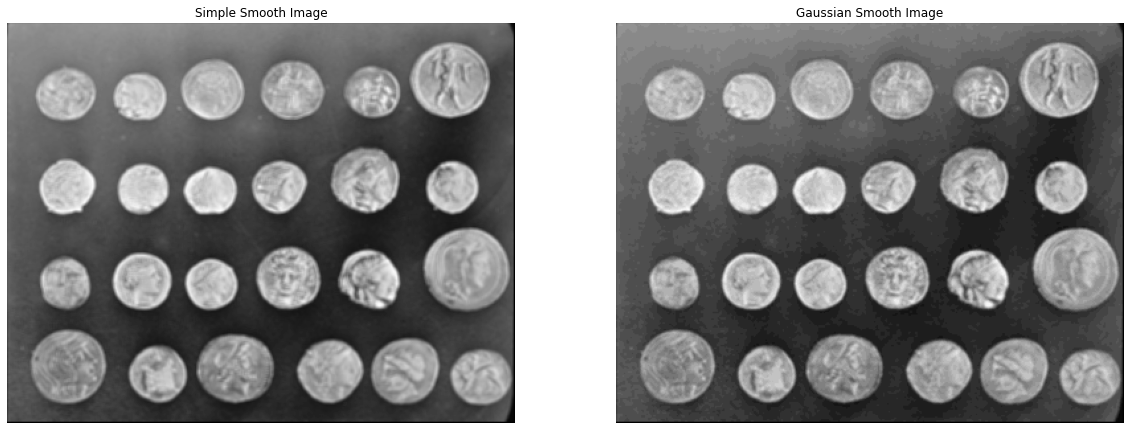

In [10]:
smooth_gauss_img = dip_localGaussianFilter(source_img)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axes[0].set_axis_off()
axes[0].set_title('Simple Smooth Image')
axes[0].imshow(smooth_img, cmap='gray')
axes[1].set_axis_off()
axes[1].set_title('Gaussian Smooth Image')
axes[1].imshow(smooth_gauss_img, cmap='gray')

## Nonlinear filters
These filters are used to remove noise from an image without affecting too much the other pixels.
- Max and Min filters
- Median filter
- Weighted median filter